# SAS to Python to PySpark conversion
This is a small use case which could be used in the field of healthcare data analysis. For example, a hospital or healthcare provider may collect a large amount of patient data including demographic information, medical history, treatment plans, and outcomes. By using SAS, the provider could analyze this data to identify trends and patterns that could inform decision-making around patient care and resource allocation.
This code defines a SAS data set called mydata with three variables: age, gender, and diagnosis. The proc means procedure is then used to calculate descriptive statistics for the age variable, such as mean, standard deviation, minimum, and maximum. Finally, the proc univariate procedure is used to create a histogram of the age variable, with a normal curve overlaid to show the distribution of the data.

# SAS Code:

In [0]:
#SAS CODE:

"""
/* Load data set */
data mydata;
  input age gender $ diagnosis $;
  datalines;
  32 M Cancer
  45 F Heart Disease
  22 M Diabetes
  51 F Cancer
  68 M Heart Disease
  57 F Diabetes
  ;
run;

/* Calculate descriptive statistics */
proc means data=mydata;
  var age;
run;

/* Create histogram */
proc univariate data=mydata;
  var age;
  histogram / normal;
run;
"""

print("SAS code")

SAS code


# Python Code:

count     6.000000
mean     45.833333
std      16.750124
min      22.000000
25%      35.250000
50%      48.000000
75%      55.500000
max      68.000000
Name: age, dtype: float64


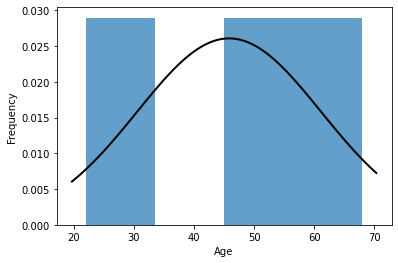

In [0]:
# Load data set
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

def calc_stats(data):
    # Calculate descriptive statistics
    age_desc_stats = data['age'].describe()
    return age_desc_stats

def show_graph(mydata):
    plt.hist(mydata['age'], bins='auto', alpha=0.7, density=True)
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    # Overlay normal curve on histogram
    mu, std = norm.fit(mydata['age'])
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    plt.show()
data = {'age': [32, 45, 22, 51, 68, 57],
        'gender': ['M', 'F', 'M', 'F', 'M', 'F'],
        'diagnosis': ['Cancer', 'Heart Disease', 'Diabetes', 'Cancer', 'Heart Disease', 'Diabetes']}

mydata = pd.DataFrame(data)
print(calc_stats(mydata))
show_graph(mydata)

# PySpark Code:

  summary                 age
0   count                   6
1    mean  45.833333333333336
2  stddev  16.750124377647666
3     min                  22
4     max                  68


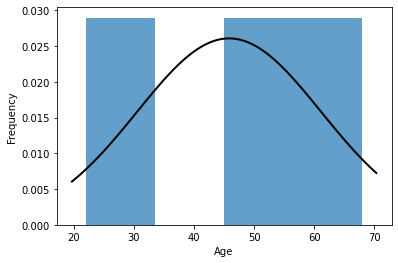

In [0]:
from pyspark.sql.functions import col, mean, stddev
from pyspark.sql.types import StructType, StructField, StringType, IntegerType
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Define the schema for the dataframe
schema = StructType([
    StructField("age", IntegerType(), True),
    StructField("gender", StringType(), True),
    StructField("diagnosis", StringType(), True)
])

# Create the Spark dataframe
data = [(32, 'M', 'Cancer'),
        (45, 'F', 'Heart Disease'),
        (22, 'M', 'Diabetes'),
        (51, 'F', 'Cancer'),
        (68, 'M', 'Heart Disease'),
        (57, 'F', 'Diabetes')]
mydata = spark.createDataFrame(data, schema)

def calc_stats(data):
    # Calculate descriptive statistics
    age_desc_stats = data.select("age").describe().toPandas()
    return age_desc_stats

def show_graph(mydata):
    # Convert PySpark dataframe to Pandas dataframe
    mydata_pd = mydata.toPandas()
    plt.hist(mydata_pd['age'], bins='auto', alpha=0.7, density=True)
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    # Overlay normal curve on histogram
    mu, std = norm.fit(mydata_pd['age'])
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    plt.show()

print(calc_stats(mydata))
show_graph(mydata)
